<a href="https://colab.research.google.com/github/sbrchar/tuw-nlp-ie-2023WS/blob/main/Final%20implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving project-group-8-1-main.zip to project-group-8-1-main.zip


In [10]:
!unzip project-group-8-1-main.zip

Archive:  project-group-8-1-main.zip
89e5d236ad1b1d11739fdafafee44d1020fb40e7
   creating: project-group-8-1-main/
  inflating: project-group-8-1-main/.gitignore  
  inflating: project-group-8-1-main/LICENSE  
  inflating: project-group-8-1-main/README.md  
   creating: project-group-8-1-main/data/
  inflating: project-group-8-1-main/data/README.md  
  inflating: project-group-8-1-main/data/download.sh  
  inflating: project-group-8-1-main/data/nlp2023_toxic_german.pdf  
  inflating: project-group-8-1-main/data/output_full.conllu  
   creating: project-group-8-1-main/docs/
  inflating: project-group-8-1-main/docs/milestone1.ipynb  
  inflating: project-group-8-1-main/docs/milestone1.md  
  inflating: project-group-8-1-main/docs/milestone1_1.ipynb  
   creating: project-group-8-1-main/images/
  inflating: project-group-8-1-main/images/tuw_nlp.png  
   creating: project-group-8-1-main/scripts/
  inflating: project-group-8-1-main/scripts/evaluate.py  
  inflating: project-group-8-1-main/s

In [11]:
%cd /content/project-group-8-1-main/

/content/project-group-8-1-main


In [12]:
!pip install -e .

Obtaining file:///content/project-group-8-1-main
  Preparing metadata (setup.py) ... done
  Attempting uninstall: tuwnlpie
    Found existing installation: tuwnlpie 0.0.1
    Uninstalling tuwnlpie-0.0.1:
      Successfully uninstalled tuwnlpie-0.0.1
  Running setup.py develop for tuwnlpie


In [13]:
!pip install pytest

In [14]:
%cd project-group-8-1-main

/content/project-group-8-1-main/project-group-8-1-main


In [15]:
from google.colab import files
uploaded = files.upload()

Saving nlp2023_toxic_german-main.zip to nlp2023_toxic_german-main.zip


In [16]:
!unzip nlp2023_toxic_german-main.zip

Archive:  nlp2023_toxic_german-main.zip
4fde8b28de989104aafed1c7844eeb5cb37cc439
   creating: nlp2023_toxic_german-main/
  inflating: nlp2023_toxic_german-main/.DS_Store  
  inflating: nlp2023_toxic_german-main/data_all.json  
  inflating: nlp2023_toxic_german-main/nlp2023_toxic_german.pdf  
   creating: nlp2023_toxic_german-main/train_dev_test/
  inflating: nlp2023_toxic_german-main/train_dev_test/split_0.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_1.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_2.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_3.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_4.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_5.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_6.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_7.json  
  inflating: nlp2023_toxic_german-main/train_dev_test/split_8.json  
  inflating: nlp2023_toxic_germ

In [17]:
import stanza

from tuwnlpie.milestone1.model import SimpleNBClassifier
from tuwnlpie.milestone1.utils import read_docs_from_csv, split_train_dev_test

In [18]:
import pandas as pd

file_path = "nlp2023_toxic_german-main/data_all.json"
df = pd.read_json(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4473 entries, 0 to 4472
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          4473 non-null   int64 
 1   Article_title  4473 non-null   object
 2   Comment        4473 non-null   object
 3   Label          4473 non-null   int64 
 4   Tags           4473 non-null   object
dtypes: int64(2), object(3)
memory usage: 174.9+ KB


In [19]:
#Check for missing data
missing_data = df.isnull()
missing_count = missing_data.sum()
print("Columns with Missing Values:")
print(missing_count[missing_count > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [20]:

#Examine the class distribution
class_distribution = df['Label'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    2818
1    1655
Name: Label, dtype: int64


In [21]:
#Identify and remove duplicate comments
#Count the number of duplicate comments
duplicate_count = df.duplicated(subset=['Comment']).sum()
print("Number of duplicate comments:", duplicate_count)

Number of duplicate comments: 276


In [22]:
#Remove duplicate comments
cleaned_df = df.drop_duplicates(subset=['Comment'])

In [23]:
#Result after the duplication vs original
original_size = len(df)
cleaned_size = len(cleaned_df)
print("Original dataset size:", original_size)
print("Cleaned dataset size:", cleaned_size)

Original dataset size: 4473
Cleaned dataset size: 4197


In [24]:
#check for comments with multiple labels
comments_with_multiple_labels = df[df.duplicated(subset=['Comment'], keep=False)]

In [25]:
cleaned_df.to_json('cleaned_data.json', orient='records', lines=True)

In [26]:
import pandas as pd

#Load the cleaned data from the JSON file
df = pd.read_json('cleaned_data.json', orient='records', lines=True)


In [27]:
#Get basic statistics
total_comments = len(df)
label_distribution = df['Label'].value_counts()
average_comment_length = df['Comment'].str.split().apply(len).mean()


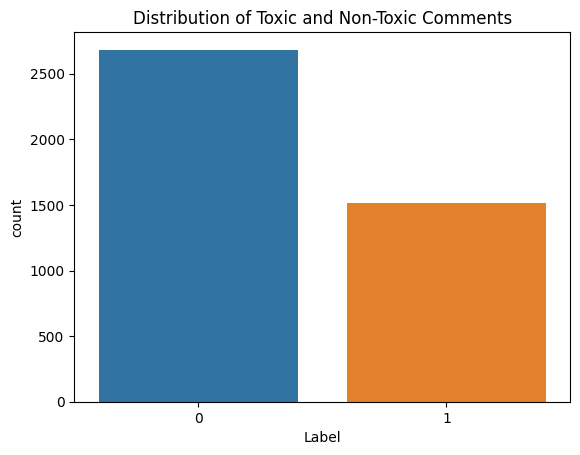

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize label distribution
sns.countplot(x='Label', data=df)
plt.title('Distribution of Toxic and Non-Toxic Comments')
plt.show()


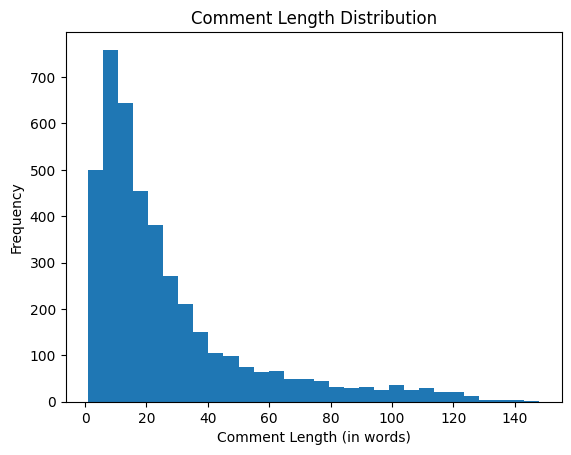

In [29]:
#Comment length distribution
plt.hist(df['Comment'].str.split().apply(len), bins=30)
plt.xlabel('Comment Length (in words)')
plt.ylabel('Frequency')
plt.title('Comment Length Distribution')
plt.show()


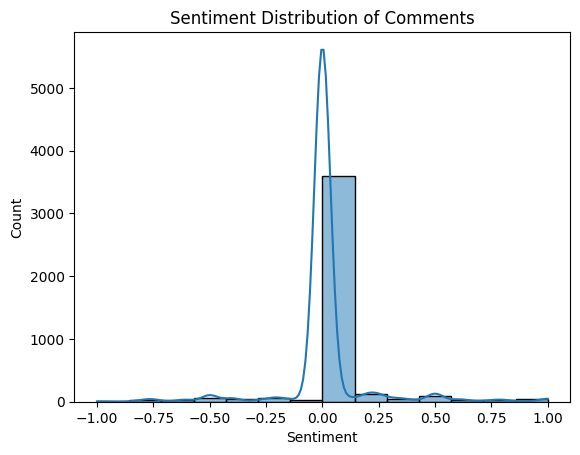

In [30]:
from textblob import TextBlob

#Calculate sentiment scores for comments
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

#Visualize sentiment distribution
sns.histplot(data=df, x='Sentiment', kde=True)
plt.title('Sentiment Distribution of Comments')
plt.show()


In [31]:
import nltk
from nltk.tokenize import word_tokenize

tokenizer = nltk.WordPunctTokenizer()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
#Tokenize all comments in a DataFrame
import pandas as pd
cleaned_df['Tokenized_Comment'] = cleaned_df['Comment'].apply(lambda x: tokenizer.tokenize(x))


In [33]:
#saving the DataFrame with tokenized comments
cleaned_df.to_csv('tokenized_data.csv', index=False)


In [34]:
import pandas as pd
import stanza
from stanza.utils.conll import CoNLL
stanza.download('de')
cleaned_df = pd.read_csv('tokenized_data.csv')
nlp = stanza.Pipeline('de', processors='tokenize,mwt,lemma,pos,sentiment')

with open('comments.conllu', 'w') as outfile:
    for comment in cleaned_df['Comment']:
        doc = nlp(comment)
        CoNLL.write_doc2conll(doc, outfile)

print("Comments have been exported to comments.conllu in CoNLL format.")





INFO:stanza:Downloading default packages for language: de (German) ...
INFO:stanza:File exists: /root/stanza_resources/de/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| pos       | gsd_charlm   |
| lemma     | gsd_nocharlm |
| sentiment | sb10k        |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: sentiment
INFO:stanza:Done loading processors!


Comments have been exported to comments.conllu in CoNLL format.
